In [6]:
import sys
import os

import spacy
from spacy.tokens import Doc
from spacy import displacy

import pandas as pd

from pyvis.network import Network
import networkx as nx
import matplotlib.pyplot as plt

import community.community_louvain as community_louvain

In [7]:
# pip install -U pip setuptools wheel
# !python -m spacy download en_core_web_sm

In [17]:
# appending a path
sys.path.append('lib/utils/')
 
# importing required module
from functions import ner, get_ne_list_per_sentence, filter_entity, create_relationships

## Load Books

In [9]:

# Get all book files in the data directory
all_books = [b for b in os.scandir('books') if b.name.endswith('.pdf')]

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)
all_books

[<DirEntry '0 - Hunger Games.pdf'>,
 <DirEntry '1 - Catching Fire.pdf'>,
 <DirEntry '2 - Mocking Jay.pdf'>]

In [10]:
# Load the Spacy model
nlp = spacy.load("en_core_web_sm")

# Process the selected books
book_docs = []
for book in all_books:
    # Specify the starting page
    if book.name == '0 - Hunger Games.pdf' or book.name == '1 - Catching Fire.pdf':
        start_page = 3  # Hunger Games, Catching Fire
    else:
        start_page = 12  # Mockingjay
    
    book_doc = ner(book.path, start_page, nlp)
    book_docs.append(book_doc)

# Combine the individual book documents into a single document
combined_doc = Doc.from_docs(book_docs)

In [11]:
# Visualize identified entities
displacy.render(combined_doc[0:2000], style="ent", jupyter=True)

## Load Characters

In [14]:
# Read characters
character_df = pd.read_csv("characters_ref.csv")

pd.set_option('display.max_rows', None)
character_df

book  \
0       Category:Catching Fire characters   
1       Category:Catching Fire characters   
2       Category:Catching Fire characters   
3       Category:Catching Fire characters   
4       Category:Catching Fire characters   
5       Category:Catching Fire characters   
6       Category:Catching Fire characters   
7       Category:Catching Fire characters   
8       Category:Catching Fire characters   
9       Category:Catching Fire characters   
10      Category:Catching Fire characters   
11      Category:Catching Fire characters   
12      Category:Catching Fire characters   
13      Category:Catching Fire characters   
14      Category:Catching Fire characters   
15      Category:Catching Fire characters   
16      Category:Catching Fire characters   
17      Category:Catching Fire characters   
18      Category:Catching Fire characters   
19      Category:Catching Fire characters   
20      Category:Catching Fire characters   
21      Category:Catching Fire characters   
22      Category:Catching Fire characters   
23      Category:Catching Fire characters   
24      Category:Catching Fire characters   
25      Category:Catching Fire characters   
26      Category:Catching Fire characters   
27      Category:Catching Fire characters   
28      Category:Catching Fire characters   
29      Category:Catching Fire characters   
30      Category:Catching Fire characters   
31      Category:Catching Fire characters   
32      Category:Catching Fire characters   
33      Category:Catching Fire characters   
34      Category:Catching Fire characters   
35      Category:Catching Fire characters   
36      Category:Catching Fire characters   
37      Category:Catching Fire characters   
38      Category:Catching Fire characters   
39      Category:Catching Fire characters   
40      Category:Catching Fire characters   
41      Category:Catching Fire characters   
42      Category:Catching Fire characters   
43      Category:Catching Fire characters   
44      Category:Catching Fire characters   
45      Category:Catching Fire characters   
46      Category:Catching Fire characters   
47      Category:Catching Fire characters   
48      Category:Catching Fire characters   
49      Category:Catching Fire characters   
50      Category:Catching Fire characters   
51      Category:Catching Fire characters   
52      Category:Catching Fire characters   
53      Category:Catching Fire characters   
54      Category:Catching Fire characters   
55      Category:Catching Fire characters   
56      Category:Catching Fire characters   
57      Category:Catching Fire characters   
58      Category:Catching Fire characters   
59      Category:Catching Fire characters   
60      Category:Catching Fire characters   
61      Category:Catching Fire characters   
62      Category:Catching Fire characters   
63      Category:Catching Fire characters   
64      Category:Catching Fire characters   
65      Category:Catching Fire characters   
66      Category:Catching Fire characters   
67      Category:Catching Fire characters   
68         Category:Mockingjay characters   
69         Category:Mockingjay characters   
70         Category:Mockingjay characters   
71         Category:Mockingjay characters   
72         Category:Mockingjay characters   
73         Category:Mockingjay characters   
74         Category:Mockingjay characters   
75         Category:Mockingjay characters   
76         Category:Mockingjay characters   
77         Category:Mockingjay characters   
78         Category:Mockingjay characters   
79         Category:Mockingjay characters   
80         Category:Mockingjay characters   
81         Category:Mockingjay characters   
82         Category:Mockingjay characters   
83         Category:Mockingjay characters   
84         Category:Mockingjay characters   
85         Category:Mockingjay characters   
86         Category:Mockingjay characters   
87         Category:Mockingjay characters   
88         Category:Mockingjay c

## Get named entity list per sentence


In [15]:
sent_entity_df = get_ne_list_per_sentence(combined_doc)
sent_entity_df

sentence  \
0      (PART, I, \n, ", THE, TRIBUTES, ", \n, 3When, ...   
1      (My, fin-, \n, gers, stretch, out, ,, seeking,...   
2      (She, must, have, had, bad, \n, dreams, and, c...   
3                       (Of, course, ,, she, did, ., \n)   
4          (This, is, the, day, of, the, reaping, ., \n)   
5               (I, prop, myself, up, on, one, elbow, .)   
6      (There, ’s, enough, light, in, the, \n, bedroo...   
7      (My, little, sister, ,, Prim, ,, curled, up, o...   
8      (In, sleep, ,, my, mother, looks, younger, ,, ...   
9      (Prim, ’s, face, is, as, fresh, as, a, raindro...   
10     (My, mother, was, \n, very, beautiful, once, ,...   
11                       (Or, so, they, tell, me, ., \n)   
12     (Sitting, at, Prim, ’s, knees, ,, guarding, he...   
13     (Mashed, -, in, nose, ,, half, of, one, ear, m...   
14     (Prim, named, him, Buttercup, ,, insisting, th...   
15                             (I, le, hates, me, ., \n)   
16                     (Or, at, least, distrusts, me, .)   
17     (Even, though, it, was, years, ago, ,, I, thin...   
18     (Scrawny, kitten, ,, belly, swollen, with, \n,...   
19     (The, last, thing, I, needed, was, \n, another...   
20     (But, Prim, begged, so, hard, ,, cried, even, ...   
21                            (It, turned, out, okay, .)   
22     (My, mother, got, rid, of, \n, 4the, vermin, a...   
23       (Even, catches, the, occa-, \n, sional, rat, .)   
24     (Sometimes, ,, when, I, clean, a, kill, ,, I, ...   
25     (He, has, stopped, hissing, at, me, ., \n, Ent...   
26                                      (No, hissing, .)   
27     (This, is, the, closest, we, will, ever, come,...   
28     (I, swing, my, legs, off, the, bed, and, slide...   
29     (Supple, leather, that, has, molded, to, my, f...   
30     (I, pull, on, trousers, ,, a, \n, shirt, ,, tu...   
31     (On, the, table, ,, under, a, wooden, bowl, to...   
32         (Prim, ’s, gift, to, me, on, reaping, day, .)   
33     (I, put, \n, the, cheese, carefully, in, my, p...   
34     (Our, part, of, District, 12, ,, nicknamed, th...   
35     (Men, and, women, with, hunched, shoulders, ,,...   
36     (But, today, the, black, cinder, streets, are,...   
37     (Shut-, \n, ters, on, the, squat, gray, houses...   
38         (The, reaping, is, n’t, un-, \n, til, two, .)   
39                         (May, as, well, sleep, in, .)   
40                                 (If, you, can, ., \n)   
41     (Our, house, is, almost, at, the, edge, of, th...   
42     (I, only, have, to, \n, pass, a, few, gates, t...   
43     (Separating, the, Meadow, from, the, woods, ,,...   
44     (In, theory, ,, it, ’s, supposed, to, be, elec...   
45     (But, since, we, ’re, lucky, to, get, two, or,...   
46     (Even, so, ,, I, always, take, a, moment, to, ...   
47     (Right, now, ,, it, ’s, silent, as, a, \n, sto...   
48     (Concealed, by, a, clump, of, bushes, ,, I, fl...   
49     (There, are, several, other, weak, spots, in, ...   
50     (As, soon, as, I, ’m, in, the, trees, ,, I, re...   
51     (Electrified, or, not, ,, the, fence, has, \n,...   
52     (Inside, the, woods, they, roam, freely, ,, an...   
53     (But, there, ’s, also, food, if, you, know, ho...   
54     (My, \n, father, knew, and, he, taught, me, so...   
55              (There, was, nothing, even, to, bury, .)   
56                         (I, \n, was, eleven, then, .)   
57     (Five, years, later, ,, I, still, wake, up, sc...   
58     (Even, though, trespassing, in, the, woods, is...   
59     (But, most, are, not, bold, enough, to, ventur...   
60     (My, bow, is, a, rarity, ,, crafted, by, my, f...   
61     (My, father, could, have, \n, made, good, mone...   
62     (Most, of, the, Peacekeepers, turn, a, blind, ...   
63     (In, fact, ,, they, ’re, among, our, best, cus...   
64     (But, the, idea, that, \n, 6someone, might, be...   
65     (In, the, fall, ,, a, few, brave, souls, sneak...   
66          (But, always, in

## Filter entities

In [18]:
filter_entity(["Peeta", "Camila", "2"], character_df)

['Peeta']

In [19]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence           entities  \
1   (My, fin-, \n, gers, stretch, out, ,, seeking,...             [Prim]   
7   (My, little, sister, ,, Prim, ,, curled, up, o...             [Prim]   
9   (Prim, ’s, face, is, as, fresh, as, a, raindro...             [Prim]   
14  (Prim, named, him, Buttercup, ,, insisting, th...        [Buttercup]   
17  (Even, though, it, was, years, ago, ,, I, thin...  [years ago, Prim]   
20  (But, Prim, begged, so, hard, ,, cried, even, ...             [Prim]   
24  (Sometimes, ,, when, I, clean, a, kill, ,, I, ...        [Buttercup]   
32      (Prim, ’s, gift, to, me, on, reaping, day, .)             [Prim]   
86  (Gale, says, I, never, smile, except, in, the,...             [Gale]   
87            (7“Hey, ,, Catnip, ,, ”, says, Gale, .)     [Catnip, Gale]   

   character_entities  
1              [Prim]  
7              [Prim]  
9              [Prim]  
14        [Buttercup]  
17             [Prim]  
20             [Prim]  
24        [Buttercup]  
32             [Prim]  
86             [Gale]  
87             [Gale]

In [20]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

C:\Users\camil\AppData\Local\Temp\ipykernel_18588\364234938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [21]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence  \
1      (My, fin-, \n, gers, stretch, out, ,, seeking,...   
7      (My, little, sister, ,, Prim, ,, curled, up, o...   
9      (Prim, ’s, face, is, as, fresh, as, a, raindro...   
14     (Prim, named, him, Buttercup, ,, insisting, th...   
17     (Even, though, it, was, years, ago, ,, I, thin...   
...                                                  ...   
26875  (Haymitch, drinks, until, the, liquor, runs, o...   
26888  (That, what, I, need, to, survive, is, not, Ga...   
26914               (Peeta, says, it, will, be, okay, .)   
26929  (First, off, ,, I, must, thank, my, extraordin...   
26948  (Library, of, Congress, Cataloging, -, in, -, ...   

                                                entities character_entities  
1                                                 [Prim]             [Prim]  
7                                                 [Prim]             [Prim]  
9                                                 [Prim]             [Prim]  
14                                           [Buttercup]        [Buttercup]  
17                                     [years ago, Prim]             [Prim]  
...                                                  ...                ...  
26875                                  [Haymitch, geese]         [Haymitch]  
26888                                             [Gale]             [Gale]  
26914                                            [Peeta]            [Peeta]  
26929                                            [First]            [First]  
26948  [Library of, First, September 2010, Internatio...            [First]  

[4715 rows x 3 columns]

## Create relationships

In [22]:
relationship_df = create_relationships(sent_entity_df_filtered, 5)
pd.set_option('display.max_rows', 10)
relationship_df

source   target  value
0    Buttercup     Prim    123
1         Gale  Katniss    101
2        Effie     Prim     18
3         Gale     Prim    219
4         Gale   Greasy     38
..         ...      ...    ...
362     Beetee   Tigris      6
363   Mitchell   Tigris      4
364      Effie  Flavius      2
365      Effie    Venia      5
366   Enobaria  Katniss      7

[367 rows x 3 columns]

## Graph analysis and visualization

In [23]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

### Graph visualization - Networkx

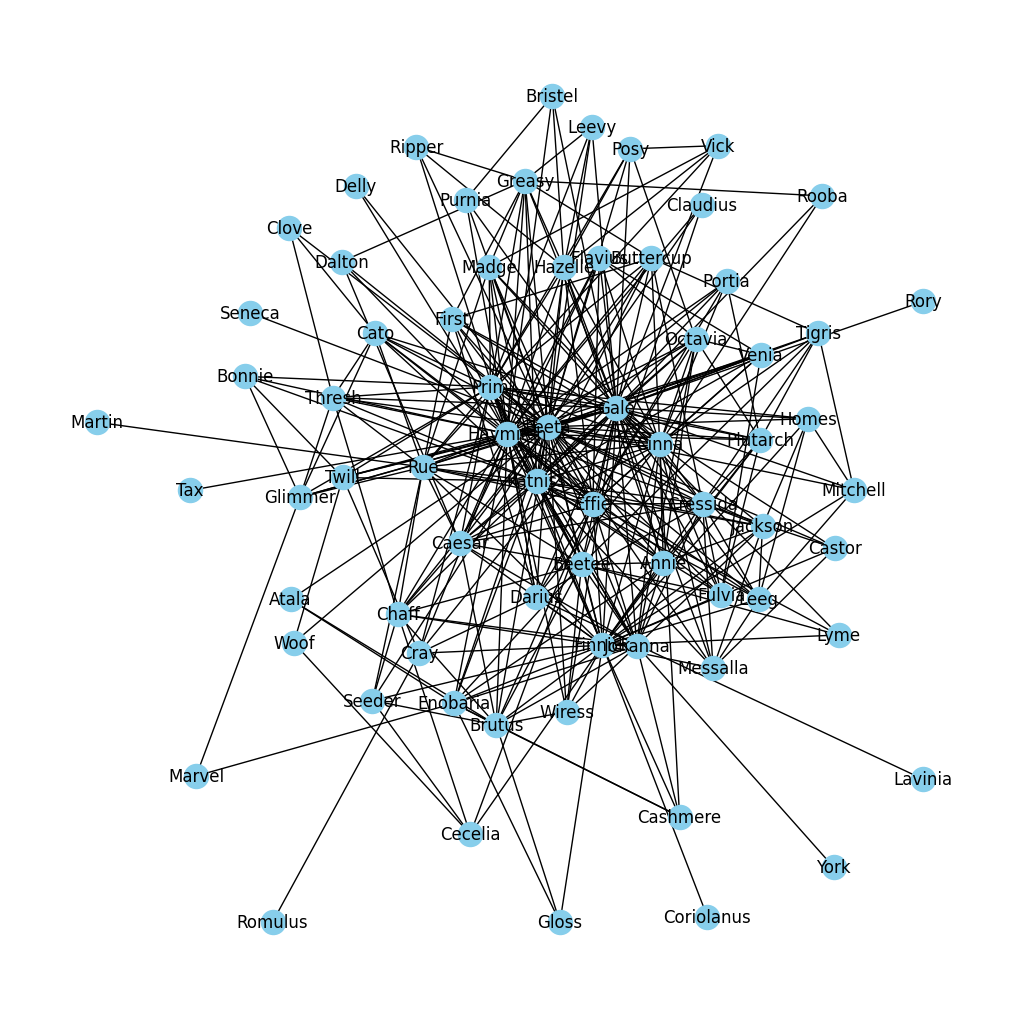

In [24]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### Graph visualization - Pyvis

In [25]:
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("hunger-games-network.html")

hunger-games-network.html


### The most important characters in The Witcher

In [26]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])

In [27]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])

In [28]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])

In [29]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

<Axes: >

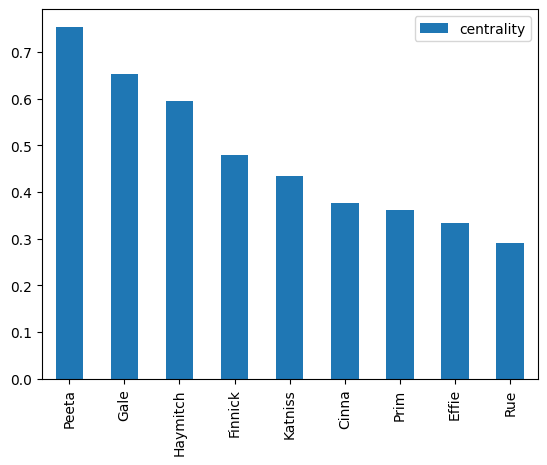

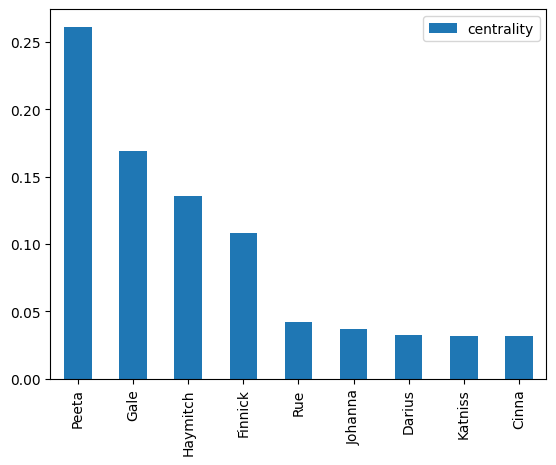

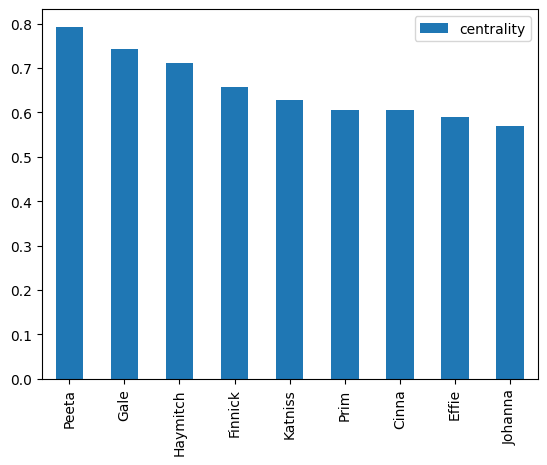

In [30]:
# Plot top 10 nodes
# Degree centrality
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

# Betweenness centrality
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

# Closeness centrality
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

#### Difference between the centralities

In network analysis, Degree centrality, Betweenness centrality, and Closeness centrality are three commonly used measures to assess the importance or centrality of nodes within a network. Here's a brief explanation of each measure:

1. Degree Centrality is a simple measure that quantifies the importance of a node based on the number of connections it has in the network. Nodes with a higher degree centrality are more connected to other nodes in the network. Degree centrality can be calculated as the number of edges connected to a node divided by the maximum possible edges. It is useful for identifying highly connected nodes, hubs, or influential individuals within a network.

2. Betweenness Centrality measures the extent to which a node lies on the shortest paths between other nodes in the network. It quantifies the importance of a node in terms of its ability to facilitate information flow between other nodes. Nodes with high betweenness centrality often act as bridges or intermediaries, connecting different parts of the network. Calculating betweenness centrality involves determining the number of shortest paths passing through a node and comparing it to the total number of shortest paths in the network.

3. Closeness Centrality measures how close a node is to all other nodes in the network. It quantifies the average distance between a node and all other nodes in the network. Nodes with high closeness centrality have a shorter average distance to other nodes and can reach other nodes more quickly. Closeness centrality is useful for identifying nodes that can efficiently spread information or influence throughout the network.

In summary, Degree centrality focuses on the number of connections, Betweenness centrality measures the node's position in facilitating information flow, and Closeness centrality assesses the node's accessibility and ability to reach other nodes quickly. Each measure provides a different perspective on node centrality, and the most appropriate measure depends on the specific research question and characteristics of the network being analyzed.

### Community detection

In [31]:
communities = community_louvain.best_partition(G)
communities

{'Buttercup': 2,
 'Prim': 1,
 'Gale': 4,
 'Katniss': 3,
 'Effie': 3,
 'Greasy': 4,
 'Madge': 3,
 'Haymitch': 3,
 'Peeta': 2,
 'Johanna': 0,
 'Venia': 3,
 'Flavius': 3,
 'Octavia': 3,
 'Cinna': 3,
 'Portia': 3,
 'Delly': 2,
 'First': 4,
 'Atala': 0,
 'Rue': 1,
 'Caesar': 0,
 'Thresh': 1,
 'Claudius': 2,
 'Cato': 1,
 'Glimmer': 1,
 'Martin': 1,
 'Rooba': 4,
 'Clove': 1,
 'Hazelle': 4,
 'Vick': 4,
 'Posy': 4,
 'Ripper': 4,
 'Cray': 1,
 'Darius': 4,
 'Seneca': 2,
 'Marvel': 1,
 'Plutarch': 3,
 'Purnia': 4,
 'Leevy': 4,
 'Bristel': 4,
 'Romulus': 1,
 'Rory': 4,
 'Bonnie': 1,
 'Twill': 1,
 'Cecelia': 0,
 'Chaff': 0,
 'Brutus': 0,
 'Finnick': 0,
 'Seeder': 0,
 'Enobaria': 0,
 'Wiress': 0,
 'Woof': 1,
 'Tax': 3,
 'Cashmere': 0,
 'Gloss': 0,
 'Beetee': 0,
 'Annie': 3,
 'Fulvia': 3,
 'Dalton': 4,
 'Cressida': 2,
 'Messalla': 2,
 'Castor': 2,
 'Coriolanus': 0,
 'Lyme': 0,
 'York': 0,
 'Jackson': 2,
 'Leeg': 2,
 'Mitchell': 2,
 'Homes': 2,
 'Lavinia': 4,
 'Tigris': 2}

In [32]:
for node, community_id in communities.items():
    print(f"Node {node} belongs to community {community_id}")

Node Buttercup belongs to community 2
Node Prim belongs to community 1
Node Gale belongs to community 4
Node Katniss belongs to community 3
Node Effie belongs to community 3
Node Greasy belongs to community 4
Node Madge belongs to community 3
Node Haymitch belongs to community 3
Node Peeta belongs to community 2
Node Johanna belongs to community 0
Node Venia belongs to community 3
Node Flavius belongs to community 3
Node Octavia belongs to community 3
Node Cinna belongs to community 3
Node Portia belongs to community 3
Node Delly belongs to community 2
Node First belongs to community 4
Node Atala belongs to community 0
Node Rue belongs to community 1
Node Caesar belongs to community 0
Node Thresh belongs to community 1
Node Claudius belongs to community 2
Node Cato belongs to community 1
Node Glimmer belongs to community 1
Node Martin belongs to community 1
Node Rooba belongs to community 4
Node Clove belongs to community 1
Node Hazelle belongs to community 4
Node Vick belongs to commu

In [33]:
nx.set_node_attributes(G, communities, 'group')

com_network = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_network.from_nx(G)
com_network.show("hunger-games-communities.html")

hunger-games-communities.html
